## 1. 데이터로더
- https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence
- batch기반의 딥러닝모델 학습을 위해 데이터를 효율적으로 읽어오는 역할


    def __init__(self, x_set, y_set, batch_size):
            self.x, self.y = x_set, y_set
            self.batch_size = batch_size

        def __len__(self):
            return math.ceil(len(self.x) / self.batch_size)

        def __getitem__(self, idx):
            batch_x = self.x[idx * self.batch_size:(idx + 1) *
            self.batch_size]
            batch_y = self.y[idx * self.batch_size:(idx + 1) *
            self.batch_size]

            return np.array([
                resize(imread(file_name), (200, 200))
                   for file_name in batch_x]), np.array(batch_y)

In [48]:
#!pip install tensorflow # 기본으로 GPU 사용

#!pip install tensorflow    # CPU 사용. GPU 없을 때 

from tensorflow import keras
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [55]:
import math

class DataGenerator(keras.utils.Sequence):
    def __init__(self, batch_size, csv_path, fold, image_size, mode='train',  shuffle=True):
        self.batch_size = batch_size
        self.fold = fold
        self.image_size = image_size
        self.mode = mode
        self.shuffle = shuffle
        
        self.df = pd.read_csv(csv_path)
        
        if self.mode == 'train':
            self.df = self.df[self.df['fold'] != self.fold]
        elif self.mode == 'val':
            self.df = self.df[self.df['fold'] == self.fold]
            
        self.on_epoch_end()
        
    # sample() : 전체 row에서 몇 %의 데이터를 return 할 것인지 설정
    # frac : 데이터프레임으로 부터 특정 비율로 무작위 표본 추출을 하고 싶으면 0~1 사이의 부동소수점 입력
    # reset_index() : drop=True 옵션을 설정하면 인덱스 열을 보통의 자료열로 설정하는 것이 아니라 버림
    # 여기서 인데스 열이란 데이터프레임 맨 앞 열에 생성되는 인덱스 열을 말함
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
            
    # len() 함수를 재구현  (공유파일 첫 달에서 스페셜매소드 파일에서 다뤘음)
    def __len__(self):
        return math.ceil(len(self.df) / self.batch_size)
    
    # 배열을 쓸 때 자동으로 불러지는 것
    def __getitem__(self, idx):
        start = idx * self.batch_size
        end = (idx + 1) * self.batch_size
        data = self.df.iloc[start:end]
        batch_x, batch_y = self.get_data(data)
        return np.array(batch_x), np.array(batch_y)
        
    def get_data(self, data):
        batch_x = []
        batch_y = []
        
        # iterrows
        # 데이터프레임에서 row의 개수만큼 반복
        # 튜플로 리턴[index, 행정보(Series)]
        for _, r in data.iterrows():             
            file_name = r['file_name']
            image = cv2.imread(f'D:/data_ai/5_AI/images/{file_name}.jpg')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (self.image_size, self.image_size))
            image = image / 255    # 정규화
            
            label = int(r['species']) - 1    # 밑에서 class_name 인덱스와 맞추기위해 (-1)해줌
            
            batch_x.append(image)
            batch_y.append(label)
            
        return batch_x, batch_y
            

In [6]:
# __getitem__
# 클래스에 인덱스 접근할 때 자동으로 호출되는 메소드
class GetItemTest:
    def __init__(self):
        print("GetItemTest 클래스의 생성자")
        self.numbers = [n for n in range(1, 11)]
        
    def __getitem__(self, idx):
        print("__getitem__ 메소드 호출!")
        return self.numbers[idx]

In [7]:
test1 = GetItemTest()

GetItemTest 클래스의 생성자


In [8]:
test1[3]

__getitem__ 메소드 호출!


4

In [56]:
# 배치사이즈 : 9
# fold : 1
# 이미지 사이즈 : 256
# 학습모드
# 셔플 사용

csv_path = 'D:/data_ai/5_AI/kfolds.csv'

train_generator = DataGenerator(
    # 옵션
    batch_size = 9, 
    csv_path = csv_path, 
    fold = 1, 
    image_size = 256, 
    mode = 'train', 
    shuffle = True
)

In [57]:
train_generator[0]

(array([[[[0.20392157, 0.41568627, 0.10196078],
          [0.21568627, 0.41960784, 0.12156863],
          [0.20392157, 0.41176471, 0.10588235],
          ...,
          [0.16078431, 0.35686275, 0.1254902 ],
          [0.16078431, 0.33333333, 0.09411765],
          [0.15686275, 0.31764706, 0.08235294]],
 
         [[0.20392157, 0.43137255, 0.10588235],
          [0.2       , 0.42745098, 0.11372549],
          [0.21568627, 0.43137255, 0.10980392],
          ...,
          [0.17254902, 0.36470588, 0.10588235],
          [0.15294118, 0.34509804, 0.09803922],
          [0.14117647, 0.33333333, 0.08235294]],
 
         [[0.21960784, 0.42745098, 0.11764706],
          [0.21176471, 0.43529412, 0.11372549],
          [0.2       , 0.43137255, 0.10196078],
          ...,
          [0.17647059, 0.36078431, 0.10196078],
          [0.17254902, 0.35294118, 0.10196078],
          [0.16078431, 0.33333333, 0.08627451]],
 
         ...,
 
         [[0.31764706, 0.44313725, 0.21176471],
          [0.34509

In [58]:
print(len(train_generator))

654


In [59]:
654 * 9

5886

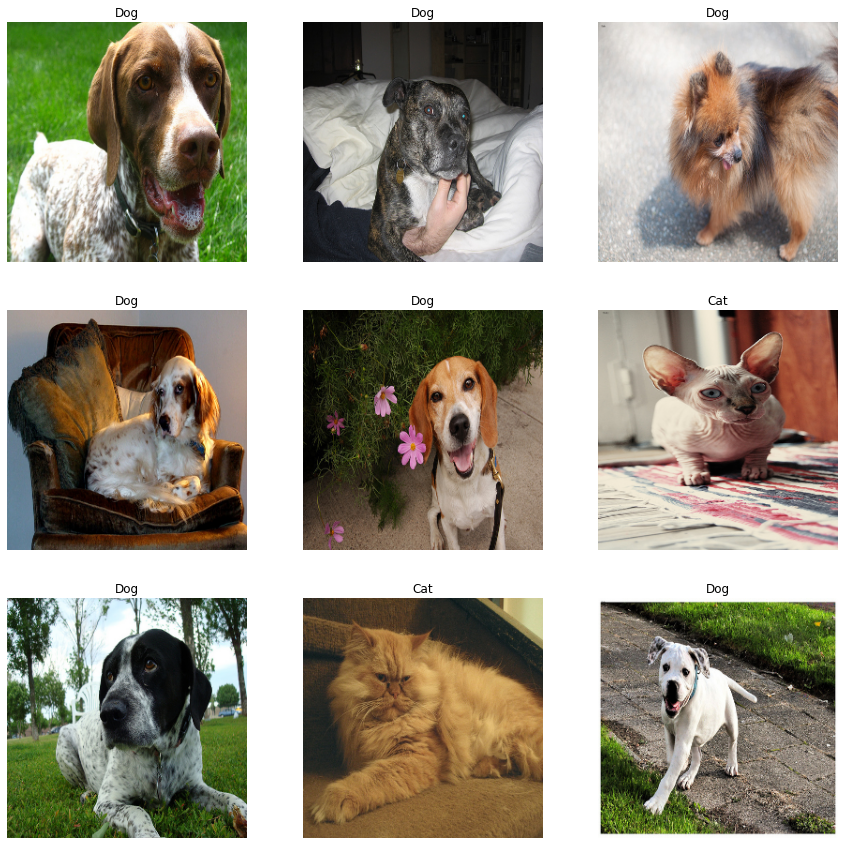

In [60]:
# 총 9개(batch 1개) 시각화

# 이미지 위에 종류(species) 출력
# 이미지 출력
# 3 * 3

class_name = ['Cat', 'Dog']

for batch in train_generator:
    X, y = batch
    plt.figure(figsize=(15, 15))
    
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(X[i])
        plt.title(class_name[y[i]])
        plt.axis('off')
    break